In [1]:
import numpy as np
import pandas as pd
from sklearn import cross_validation,preprocessing,tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

rank = pd.read_csv('ranking.csv').fillna(0).sort_values('season_number')

rank.head()



/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,contestant_name,season_number,BTM2,HIGH,LOW,SAFE,WIN,Winner
0,Akashia,1,2.0,0.0,0.0,0.0,0.0,0.0
1,BeBe Zahara Benet,1,1.0,1.0,0.0,2.0,2.0,1.0
2,Jade,1,0.0,0.0,1.0,2.0,0.0,0.0
3,Nina Flowers,1,0.0,4.0,1.0,0.0,1.0,0.0
4,Ongina,1,0.0,2.0,0.0,0.0,2.0,0.0


In [2]:
#number of contestants per episode

allrank = pd.read_csv('allrank.csv')

numep = allrank['contestant_name'].value_counts().to_frame()

numep.reset_index(inplace=True)




In [3]:
numep = numep.rename(columns = {'contestant_name' : 'num_appear','index': 'contestant_name'})
numep.head()

,contestant_name,num_appear
0,Manila Luzon,14
1,Aquaria,14
2,Sasha Velour,14
3,Asia O'Hara,14
4,Kameron Michaels,14


In [4]:
#adding how many episodes a contestant was in the show

rank2 = rank.merge(numep,on='contestant_name').rename(columns={'contestant_name_y': 'num_cont', 'contestant_name_x': 'contestant_name'})[['contestant_name','season_number','num_appear','WIN','HIGH','SAFE','LOW','BTM2','Winner']]

rank2.head()

,contestant_name,season_number,num_appear,WIN,HIGH,SAFE,LOW,BTM2,Winner
0,Akashia,1,4,0.0,0.0,0.0,0.0,2.0,0.0
1,BeBe Zahara Benet,1,8,2.0,1.0,2.0,0.0,1.0,1.0
2,Jade,1,5,0.0,0.0,2.0,1.0,0.0,0.0
3,Nina Flowers,1,8,1.0,4.0,0.0,1.0,0.0,0.0
4,Ongina,1,6,2.0,2.0,0.0,0.0,0.0,0.0


In [5]:
#adding season outcome
season_outcome = pd.read_csv('contestant_data.csv')

rank3 = rank2.merge(season_outcome,on='contestant_name')

#adding drag race score

rank3['score'] = rank3['WIN']*2 + rank3['HIGH']*1 + rank3['SAFE']*0 + rank3['LOW']*(-1) + rank3['BTM2']*(-2)

#rank3.loc[rank3['season_number'] == 11].sort_values('WIN')

rank3.loc[rank3['Winner']== 1].sort_values('season_number')


,contestant_name,season_number,num_appear,WIN,HIGH,SAFE,LOW,BTM2,Winner,season_outcome,score
1,BeBe Zahara Benet,1,8,2.0,1.0,2.0,0.0,1.0,1.0,1.0,3.0
9,Tyra Sanchez,2,11,3.0,4.0,1.0,1.0,0.0,1.0,1.0,9.0
25,Raja,3,14,3.0,4.0,3.0,1.0,1.0,1.0,1.0,7.0
36,Sharon Needles,4,13,4.0,3.0,3.0,1.0,1.0,1.0,1.0,8.0
53,Jinkx Monsoon,5,13,2.0,6.0,3.0,0.0,1.0,1.0,1.0,8.0
71,Bianca Del Rio,6,12,3.0,4.0,4.0,0.0,0.0,1.0,1.0,10.0
75,Violet Chachki,7,13,3.0,2.0,5.0,2.0,0.0,1.0,1.0,6.0
99,Bob the Drag Queen,8,10,3.0,0.0,5.0,0.0,1.0,1.0,1.0,4.0
105,Sasha Velour,9,14,2.0,5.0,4.0,1.0,0.0,1.0,1.0,8.0
126,Aquaria,10,14,3.0,1.0,6.0,2.0,0.0,1.0,1.0,5.0


In [6]:
#percentages of each episode outcome
rank3[['WIN','HIGH','SAFE','LOW','BTM2']] = rank3[['WIN','HIGH','SAFE','LOW','BTM2']].div(rank3['num_appear'].values, axis=0)*100

rank3.round(2).loc[rank3['Winner'] == 1].sort_values('season_number')


,contestant_name,season_number,num_appear,WIN,HIGH,SAFE,LOW,BTM2,Winner,season_outcome,score
1,BeBe Zahara Benet,1,8,25.00,12.50,25.00,0.00,12.50,1.0,1.0,3.0
9,Tyra Sanchez,2,11,27.27,36.36,9.09,9.09,0.00,1.0,1.0,9.0
25,Raja,3,14,21.43,28.57,21.43,7.14,7.14,1.0,1.0,7.0
36,Sharon Needles,4,13,30.77,23.08,23.08,7.69,7.69,1.0,1.0,8.0
53,Jinkx Monsoon,5,13,15.38,46.15,23.08,0.00,7.69,1.0,1.0,8.0
71,Bianca Del Rio,6,12,25.00,33.33,33.33,0.00,0.00,1.0,1.0,10.0
75,Violet Chachki,7,13,23.08,15.38,38.46,15.38,0.00,1.0,1.0,6.0
99,Bob the Drag Queen,8,10,30.00,0.00,50.00,0.00,10.00,1.0,1.0,4.0
105,Sasha Velour,9,14,14.29,35.71,28.57,7.14,0.00,1.0,1.0,8.0
126,Aquaria,10,14,21.43,7.14,42.86,14.29,0.00,1.0,1.0,5.0


In [7]:
rank3.round(2).loc[rank3['season_number'] == 11].loc[rank3['season_outcome'].isnull()].sort_values(by = 'score', ascending = False)



,contestant_name,season_number,num_appear,WIN,HIGH,SAFE,LOW,BTM2,Winner,season_outcome,score
137,Brooke Lynn Hytes,11,12,25.00,50.00,0.00,8.33,8.33,0.0,NaN,9.0
139,A'keria Chanel Davenport,11,12,16.67,16.67,41.67,0.00,8.33,0.0,NaN,4.0
142,Yvie Oddly,11,12,8.33,41.67,25.00,8.33,8.33,0.0,NaN,4.0
128,Silky Nutmeg Ganache,11,12,16.67,25.00,25.00,16.67,8.33,0.0,NaN,3.0
131,Vanessa Vanjie Mateo,11,12,0.00,16.67,33.33,16.67,8.33,0.0,NaN,-2.0


In [8]:
rank3.round(2).nsmallest(10,'score')[['contestant_name','season_number','season_outcome','score']]

,contestant_name,season_number,season_outcome,score
68,Darienne Lake,6,4.0,-6.0
85,Kandy Ho,7,10.0,-5.0
0,Akashia,1,7.0,-4.0
18,Jujubee,2,3.0,-4.0
31,Carmen Carrera,3,5.0,-4.0
44,DiDa Ritz,4,6.0,-4.0
58,Coco Montrese,5,5.0,-4.0
132,Ra'jah D. O'Hara,11,9.0,-4.0
30,Delta Work,3,7.0,-3.0
38,Milan,4,9.0,-3.0


In [9]:
#Extract finalist data

finals = rank3.round(2).loc[rank3['season_outcome'] < 4]

#Find the max value of each column and find the distance from the max value per season

finals['WIN_FM'] = (finals.groupby('season_number').WIN.max() - finals.set_index('season_number').WIN).values
finals['HIGH_FM'] = (finals.groupby('season_number').HIGH.max() - finals.set_index('season_number').HIGH).values
finals['SAFE_FM'] = (finals.groupby('season_number').SAFE.max() - finals.set_index('season_number').SAFE).values
finals['LOW_FM'] = (finals.groupby('season_number').LOW.max() - finals.set_index('season_number').LOW).values
finals['BTM2_FM'] = (finals.groupby('season_number').BTM2.max() - finals.set_index('season_number').BTM2).values
finals['score_FM'] = (finals.groupby('season_number').score.max() - finals.set_index('season_number').score).values

finals2 = finals[['contestant_name','season_number','WIN_FM','HIGH_FM','SAFE_FM','LOW_FM','BTM2_FM','score_FM','season_outcome','Winner']]

finals2.loc[finals2['Winner'] == 1].sort_values('season_number')



,contestant_name,season_number,WIN_FM,HIGH_FM,SAFE_FM,LOW_FM,BTM2_FM,score_FM,season_outcome,Winner
1,BeBe Zahara Benet,1,0.00,37.50,0.00,12.50,12.50,2.0,1.0,1.0
9,Tyra Sanchez,2,0.00,0.00,9.09,0.00,27.27,0.0,1.0,1.0
25,Raja,3,0.00,0.00,0.00,0.00,14.29,0.0,1.0,1.0
36,Sharon Needles,4,0.00,7.69,7.69,7.69,0.00,0.0,1.0,1.0
53,Jinkx Monsoon,5,0.00,0.00,7.69,15.38,0.00,0.0,1.0,1.0
71,Bianca Del Rio,6,0.00,0.00,8.34,25.00,16.67,0.0,1.0,1.0
75,Violet Chachki,7,0.00,0.00,15.39,0.00,15.38,0.0,1.0,1.0
99,Bob the Drag Queen,8,0.00,20.00,0.00,10.00,0.00,1.0,1.0,1.0
105,Sasha Velour,9,14.28,0.00,7.14,7.15,14.29,1.0,1.0,1.0
126,Aquaria,10,0.00,21.43,0.00,0.00,21.43,0.0,1.0,1.0


In [10]:
#Histograms and feature selection

from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder

X = finals2[['WIN_FM','HIGH_FM','SAFE_FM','LOW_FM','BTM2_FM','score_FM']].values

feature_dict = {i:label for i,label in zip(
                range(6),
                  ('% Wins from max','% High from max','% Safe from max',
                  '% Low from max','% Bottom from max','Score from max', ))}
y = finals2['season_outcome'].values

label_dict = {1: 'Winner', 2: 'Runner Up', 3:'2nd Runner Up'}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(7)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    #plotting histograms
    for lab,col in zip(range(1,7), ('blue','red','red')):
        ax.hist(X[y==lab,cnt],
               color=col,
               label='%s' %label_dict[lab],
               bins=bins,
               alpha=0.5,)
    ylims = ax.get_ylim()
    
    #plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    #ax.set_title('Episode Outcome Histogram #%s' %str(cnt+1))
    
    #hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")
    
    #remove spines on axis
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()

plt.show()
    
    

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'green', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='lower right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
        
        
        

/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


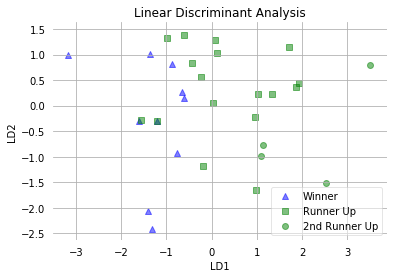

In [12]:
plot_scikit_lda(X_lda_sklearn, title='Linear Discriminant Analysis')

In [13]:
# Preparing Data for Modeling

XData = finals2[['WIN_FM','HIGH_FM','SAFE_FM','LOW_FM','BTM2_FM','score_FM']]
YData = finals2['Winner']

print "X: ", XData[0:5]
print "Y: ", YData[0:5]

X:      WIN_FM  HIGH_FM  SAFE_FM  LOW_FM  BTM2_FM  score_FM
1     0.00    37.50     0.00   12.50    12.50       2.0
3    12.50     0.00    25.00    0.00    25.00       0.0
5    12.50    37.50    12.50    0.00     0.00       7.0
9     0.00     0.00     9.09    0.00    27.27       0.0
14    9.09     9.09     0.00    9.09     9.09       6.0
Y:  1     1.0
3     0.0
5     0.0
9     1.0
14    0.0
Name: Winner, dtype: float64


In [14]:
# Splitting Testing and Training

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
    XData, YData, test_size=0.3, random_state=5)

print "Training set samples: ", len(X_train)
print "Testing set samples: ", len(Y_test)

Training set samples:  21
Testing set samples:  10


In [15]:
# Standardize the data

stdscaler = preprocessing.StandardScaler().fit(X_train)

X_scaled = stdscaler.transform(XData)
X_train = stdscaler.transform(X_train)
X_test = stdscaler.transform(X_test)

In [16]:
#KNN
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
knn_predicted = knn.predict((X_test))

print "\nClassification Report:"
print classification_report(Y_test,knn_predicted)
print("Accuracy:",metrics.accuracy_score(Y_test, knn_predicted))


Classification Report:
             precision    recall  f1-score   support

        0.0       0.60      1.00      0.75         6
        1.0       0.00      0.00      0.00         4

avg / total       0.36      0.60      0.45        10

('Accuracy:', 0.6)


/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

lr_predicted = lr.predict(X_test)

print "\nClassification Report:"
print classification_report(Y_test,lr_predicted)
print("Accuracy:",metrics.accuracy_score(Y_test, lr_predicted))


Classification Report:
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80         6
        1.0       1.00      0.25      0.40         4

avg / total       0.80      0.70      0.64        10

('Accuracy:', 0.7)


In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

rfc_pred = rfc.predict(X_test)

print "\nClassification Report:"
print classification_report(Y_test,rfc_pred)
print "Accuracy:", metrics.accuracy_score(Y_test, rfc_pred)

print rfc_pred


Classification Report:
             precision    recall  f1-score   support

        0.0       0.75      1.00      0.86         6
        1.0       1.00      0.50      0.67         4

avg / total       0.85      0.80      0.78        10

Accuracy: 0.8
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]


In [19]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(X_train, Y_train)
dt_predicted = dtc.predict(X_test)

print "\nClassification Report:"
print classification_report(Y_test,dt_predicted)
print("Accuracy:",metrics.accuracy_score(Y_test, dt_predicted))


Classification Report:
             precision    recall  f1-score   support

        0.0       0.86      1.00      0.92         6
        1.0       1.00      0.75      0.86         4

avg / total       0.91      0.90      0.90        10

('Accuracy:', 0.9)


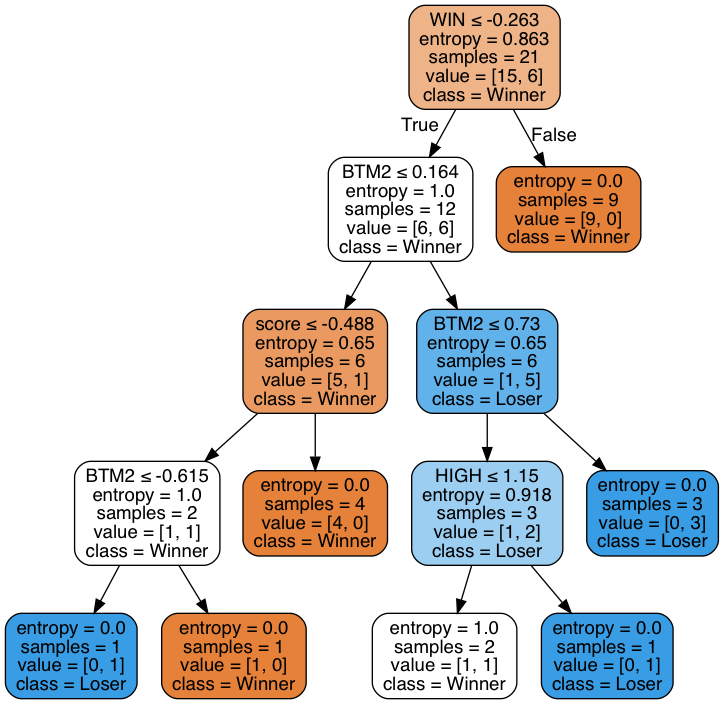

In [20]:
# Plotting Decision Tree

import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image

feature_names = ['WIN',
 'HIGH', 'SAFE',
 'LOW', 'BTM2','score']
target_names = ['Winner', 'Loser']

dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=feature_names,  
                          class_names=target_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [21]:
#Bayesian
from sklearn.naive_bayes import GaussianNB
gnb = LogisticRegression()
gnb.fit(X_train, Y_train)

gnb_predicted = lr.predict(X_test)

print "\nClassification Report:"
print classification_report(Y_test,gnb_predicted)
print("Accuracy:",metrics.accuracy_score(Y_test, lr_predicted))



Classification Report:
             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80         6
        1.0       1.00      0.25      0.40         4

avg / total       0.80      0.70      0.64        10

('Accuracy:', 0.7)


In [22]:
# Ensemble

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(solver='lbfgs',random_state=5)
#clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf4 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf3),('rf', clf4)], voting='hard')

for clf, label in zip([clf1, clf3, clf4, eclf], ['Logistic Regression', 'Decision Tree','Random Forest','Ensemble']):
    scores = cross_val_score(clf, X_train, Y_train, cv=4, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.73 (+/- 0.16) [Logistic Regression]
Accuracy: 0.73 (+/- 0.20) [Decision Tree]
Accuracy: 0.73 (+/- 0.20) [Random Forest]


/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 0.73 (+/- 0.20) [Ensemble]


/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/aaronmasanque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
